In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import pandas as pd
import numpy as np
%aimport Variant_analysis_helper_functions

import subprocess
from scipy.stats import chisquare
import os
import protfasta
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
d_domains = "../outputs/mutations/domains_gnomad_snv_classified/"
files = os.listdir(d_domains)
ENST_codes = [f.replace(".bed", "") for f in files]

uniprotID_ENST_mapping = pd.read_csv("../../data/SFARI_TFs_with_ENST.csv")
uniprotID_ENST_mapping = uniprotID_ENST_mapping[["uniprotID", "ENST"]]
uniprotID_ENST_mapping["ENST"] = uniprotID_ENST_mapping["ENST"].str.split(".").str[0]
uniprotID_ENST_mapping_dict= dict(zip(uniprotID_ENST_mapping["ENST"], uniprotID_ENST_mapping["uniprotID"]))
uniprotID_ENST_mapping_dict['ENST00000434704'] = 'O60479'

SFARI_TFs = pd.read_csv("../../data/SFARI_TFs_with_ENST.csv")

In [4]:
gnomad_output = Variant_analysis_helper_functions.generate_df(ENST_codes, uniprotID_ENST_mapping_dict, 0, 1, domain_types = ["AD", "DBD"], print_output = False, variant_filename = "gnomad")

In [5]:
iWES_output = output = Variant_analysis_helper_functions.generate_df(ENST_codes, uniprotID_ENST_mapping_dict, 0, 1, domain_types = ["AD", "DBD"], print_output = False, variant_filename = "expanded_iWES_v2_variants")

In [6]:
gnomad_output

,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop
0,P15884,2004,557,0.277944,483,118,0.244306,0,0,NaN
1,O94983,3609,1457,0.403713,882,365,0.413832,378,94,0.248677
2,Q96QS3,1689,413,0.244523,273,59,0.216117,180,13,0.072222
3,P20393,1845,758,0.410840,834,291,0.348921,231,62,0.268398
4,Q8NBF1,1863,899,0.482555,522,247,0.473180,0,0,NaN
5,Q06889,1164,349,0.299828,606,219,0.361386,0,0,NaN
6,Q9Y4A8,2085,1250,0.599520,600,364,0.606667,0,0,NaN
7,P35398,1572,493,0.313613,342,82,0.239766,198,23,0.116162
8,Q9HBZ2,2154,822,0.381616,582,219,0.376289,0,0,NaN
9,Q14872,2262,705,0.311671,891,298,0.334456,0,0,NaN


In [7]:
iWES_output

,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop
0,P15884,2004,133,0.066367,483,25,0.051760,0,0,NaN
1,O94983,3609,449,0.124411,882,108,0.122449,378,23,0.060847
2,Q96QS3,1689,146,0.086442,273,20,0.073260,180,3,0.016667
3,P20393,1845,218,0.118157,834,89,0.106715,231,13,0.056277
4,Q8NBF1,1863,303,0.162641,522,75,0.143678,0,0,NaN
5,Q06889,1164,101,0.086770,606,61,0.100660,0,0,NaN
6,Q9Y4A8,2085,350,0.167866,600,98,0.163333,0,0,NaN
7,P35398,1572,140,0.089059,342,14,0.040936,198,5,0.025253
8,Q9HBZ2,2154,217,0.100743,582,49,0.084192,0,0,NaN
9,Q14872,2262,214,0.094607,891,98,0.109989,0,0,NaN


In [34]:
iWES_output = pd.merge(SFARI_TFs[["gene-symbol", "uniprotID"]], iWES_output)
gnomad_output = pd.merge(SFARI_TFs[["gene-symbol", "uniprotID"]], gnomad_output)

In [35]:
merged = pd.merge(gnomad_output, iWES_output, 
                  suffixes = ("_gnomad", "_iWES"), on = "uniprotID")
merged

,gene-symbol_gnomad,uniprotID,TF_cds_length_gnomad,TF_missense_gnomad,TF_missense_prop_gnomad,AD_cds_length_gnomad,AD_missense_gnomad,AD_missense_prop_gnomad,DBD_cds_length_gnomad,DBD_missense_gnomad,...,gene-symbol_iWES,TF_cds_length_iWES,TF_missense_iWES,TF_missense_prop_iWES,AD_cds_length_iWES,AD_missense_iWES,AD_missense_prop_iWES,DBD_cds_length_iWES,DBD_missense_iWES,DBD_missense_prop_iWES
0,ARNT2,Q9HBZ2,2154,822,0.381616,582,219,0.376289,0,0,...,ARNT2,2154,217,0.100743,582,49,0.084192,0,0,NaN
1,ARX,Q96QS3,1689,413,0.244523,273,59,0.216117,180,13,...,ARX,1689,146,0.086442,273,20,0.073260,180,3,0.016667
2,CASZ1,Q86V15,5280,2362,0.447348,465,234,0.503226,0,0,...,CASZ1,5280,734,0.139015,465,87,0.187097,0,0,NaN
3,CC2D1A,Q6P1N0,2856,1257,0.440126,117,42,0.358974,0,0,...,CC2D1A,2856,435,0.152311,117,13,0.111111,0,0,NaN
4,CAMTA2,O94983,3609,1457,0.403713,882,365,0.413832,378,94,...,CAMTA2,3609,449,0.124411,882,108,0.122449,378,23,0.060847
5,EBF3,Q9H4W6,1791,559,0.312116,240,58,0.241667,0,0,...,EBF3,1791,138,0.077052,240,17,0.070833,0,0,NaN
6,EGR3,Q06889,1164,349,0.299828,606,219,0.361386,0,0,...,EGR3,1164,101,0.086770,606,61,0.100660,0,0,NaN
7,ESR2,Q92731,1593,765,0.480226,1035,481,0.464734,198,83,...,ESR2,1593,209,0.131199,1035,126,0.121739,198,27,0.136364
8,GLIS1,Q8NBF1,1863,899,0.482555,522,247,0.473180,0,0,...,GLIS1,1863,303,0.162641,522,75,0.143678,0,0,NaN
9,ERG,P11308,1461,475,0.325120,573,191,0.333333,243,30,...,ERG,1461,131,0.089665,573,55,0.095986,243,7,0.028807


In [40]:
merged_AD_missense = merged[["gene-symbol_gnomad", "uniprotID", "AD_cds_length_iWES", "AD_missense_iWES", "AD_missense_gnomad"]]
merged_AD_missense = merged_AD_missense.rename(columns = {"AD_cds_length_iWES" : "AD_cds_length",
                                                         "gene-symbol_gnomad":"gene-symbol"})
merged_AD_missense

,gene-symbol,uniprotID,AD_cds_length,AD_missense_iWES,AD_missense_gnomad
0,ARNT2,Q9HBZ2,582,49,219
1,ARX,Q96QS3,273,20,59
2,CASZ1,Q86V15,465,87,234
3,CC2D1A,Q6P1N0,117,13,42
4,CAMTA2,O94983,882,108,365
5,EBF3,Q9H4W6,240,17,58
6,EGR3,Q06889,606,61,219
7,ESR2,Q92731,1035,126,481
8,GLIS1,Q8NBF1,522,75,247
9,ERG,P11308,573,55,191


In [41]:
merged_AD_missense["iWES_to_gnomad_ratio"] = merged_AD_missense["AD_missense_iWES"] / merged_AD_missense["AD_missense_gnomad"]
merged_AD_missense

,gene-symbol,uniprotID,AD_cds_length,AD_missense_iWES,AD_missense_gnomad,iWES_to_gnomad_ratio
0,ARNT2,Q9HBZ2,582,49,219,0.223744
1,ARX,Q96QS3,273,20,59,0.338983
2,CASZ1,Q86V15,465,87,234,0.371795
3,CC2D1A,Q6P1N0,117,13,42,0.309524
4,CAMTA2,O94983,882,108,365,0.295890
5,EBF3,Q9H4W6,240,17,58,0.293103
6,EGR3,Q06889,606,61,219,0.278539
7,ESR2,Q92731,1035,126,481,0.261954
8,GLIS1,Q8NBF1,522,75,247,0.303644
9,ERG,P11308,573,55,191,0.287958


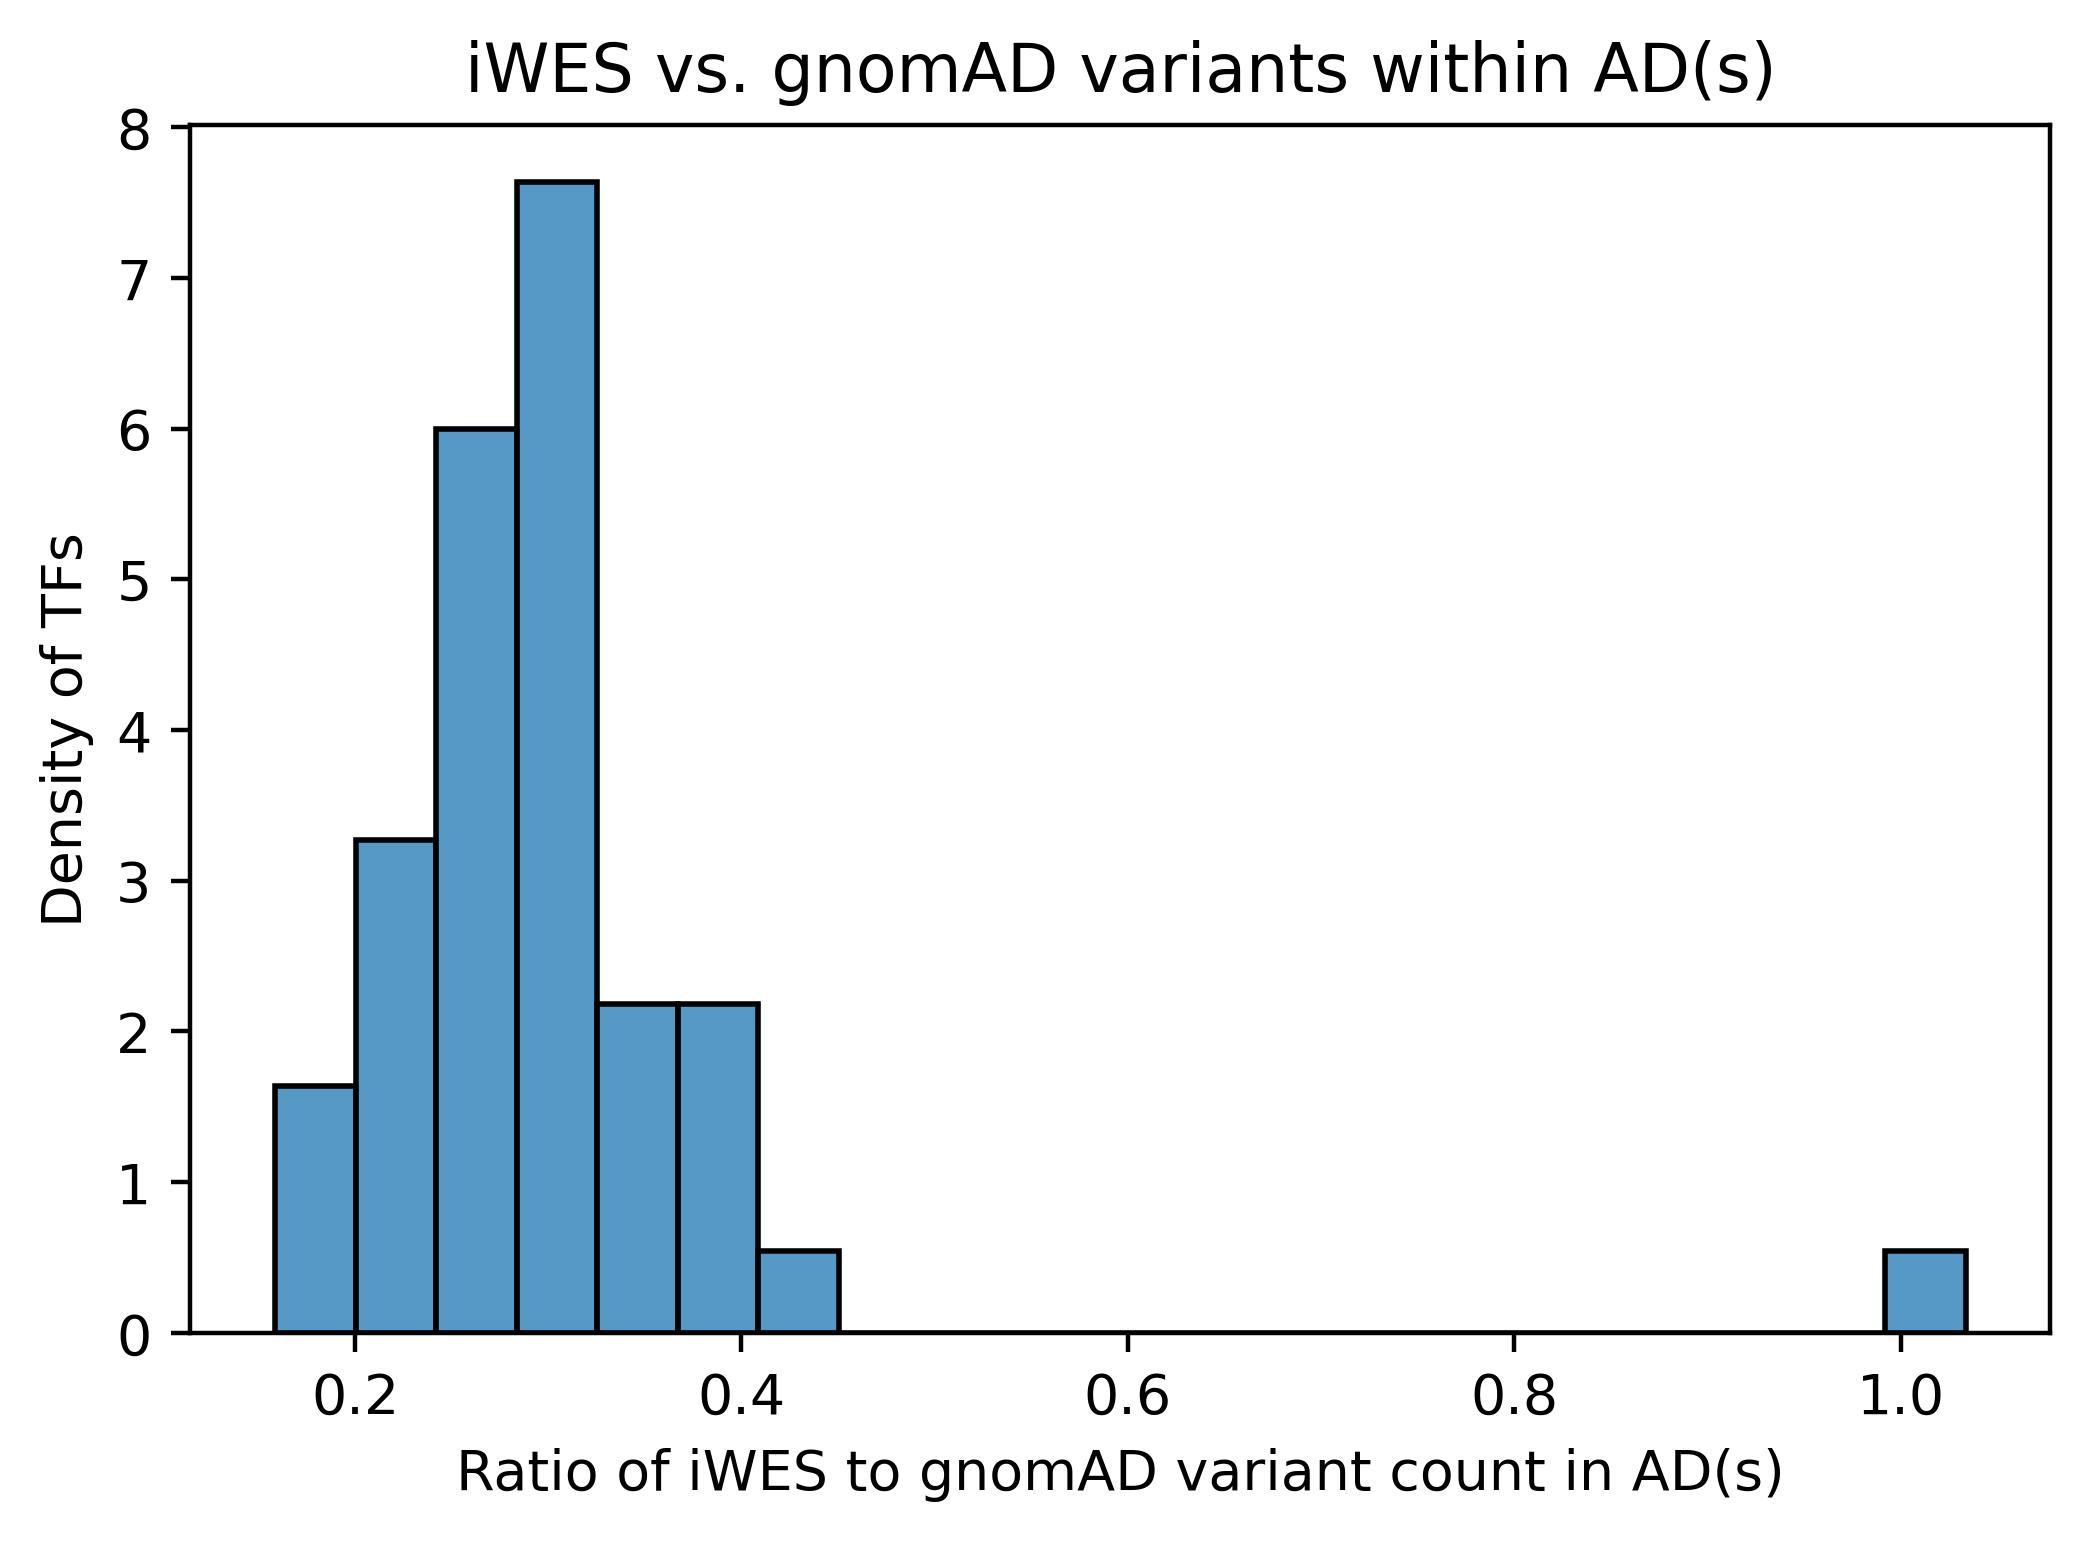

In [57]:
plt.figure(figsize=(6, 4), dpi = 400)
sns.histplot(merged_AD_missense["iWES_to_gnomad_ratio"], stat = "density")
plt.title("iWES vs. gnomAD variants within AD(s)");
plt.xlabel("Ratio of iWES to gnomAD variant count in AD(s)");
plt.ylabel("Density of TFs");

In [43]:
merged_AD_missense.sort_values(by = "iWES_to_gnomad_ratio", ascending = False)

,gene-symbol,uniprotID,AD_cds_length,AD_missense_iWES,AD_missense_gnomad,iWES_to_gnomad_ratio
10,HIVEP3,Q5T1R4,2592,336,325,1.033846
43,VDR,P11473,171,20,45,0.444444
27,NKX2-2,O95096,162,35,86,0.406977
13,KLF16,Q9BXK1,132,26,67,0.388060
18,MSX2,P35548,102,14,37,0.378378
2,CASZ1,Q86V15,465,87,234,0.371795
17,MEIS2,O14770,414,67,186,0.360215
1,ARX,Q96QS3,273,20,59,0.338983
40,TFE3,P19532,1059,90,272,0.330882
19,MTF1,Q14872,891,98,298,0.328859
